<a href="https://colab.research.google.com/github/Miswanto313/Machine_Learning/blob/main/SKLearn_with_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset yang akan kita gunakan adalah data lama kerja seseorang dan gajinya. Dataset ini dapat diunduh pada [tautan](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression) berikut

Import library dasar yang digunakn

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.preprocessing import StandardScaler

Ubah berkas dataset menjadi dataframe.

In [4]:
data = pd.read_csv('/content/sample_data/Salary_Data.csv')

Mengimpor library numpy

In [5]:
import numpy as np


Pisahkan atribut dan label pada dataset

In [6]:
X = data['YearsExperience']
y = data['Salary']

Jika hanya terdapat 1 atribut pada dataset kita perlu mengubah bentuknya agar bisa dipakai pada pelatihan model

In [7]:
X = X[:, np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


impor library GridSearchCV dari sklearn.model_selection

In [8]:
from sklearn.model_selection import GridSearchCV

Mbuat model yang ingin kita uji dengan grid search dalam hal ini model SVR

In [10]:
from sklearn.svm import SVR

In [11]:
model = SVR()

Kemudian kita buat sebuah python dictionary yang berisi nama parameter yang akan diuji, serta nilai-nilainya. Selanjutnya kita buat objek grid search dan mengisi parameter-parameternya. Parameter pertama adalah model yang akan kita uji

In [13]:
parameters = {
    'kernel': ['rbf'],
    'C' : [1000, 10000, 100000],
    'gamma' : [0.5, 0.05, 0.005]
}

Parameter kedua adalah dictionary yang berisi kumpulan parameter dari model yang akan diuji.

In [14]:
grid_search = GridSearchCV(model, parameters)

Panggil fungsi fit() pada objek grid search yang telah kita buat.

In [15]:
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Setelah grid search mencari parameter terbaik pada model, kita bisa menampilkan parameter terbaik dengan memanggil atribut best_params_ dari objek grid search

In [16]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


Membuat model SVM baru dengan parameter hasil grid search dan melatihnya pada data.

In [17]:
model_baru = SVR(C = 100000, gamma= 0.005, kernel = 'rbf')

In [18]:
model_baru.fit(X, y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
import matplotlib.pyplot as plt


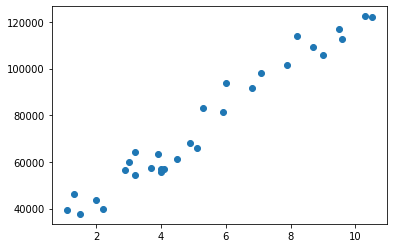

In [20]:
plt.scatter(X, y)

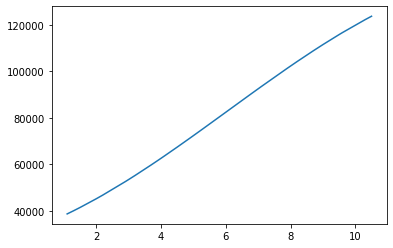

In [21]:
plt.plot(X, model_baru.predict(X))

Memvisualisasikan SVR dengan parameter hasil grid search. 

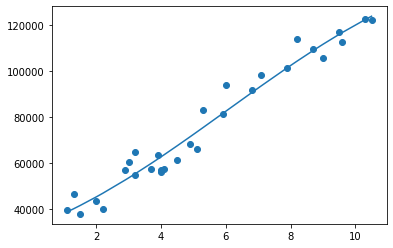

In [22]:
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

Dapat dilihat dari hasil plot bahwa grid search berhasil mencari parameter yang lebih baik sehingga meningkatkan performa dari model